In [1]:
from map_manager.map_generator import map
from map_manager.noise import toddler
import matplotlib.pyplot as plt
import numpy as np

/Users/cetiners/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


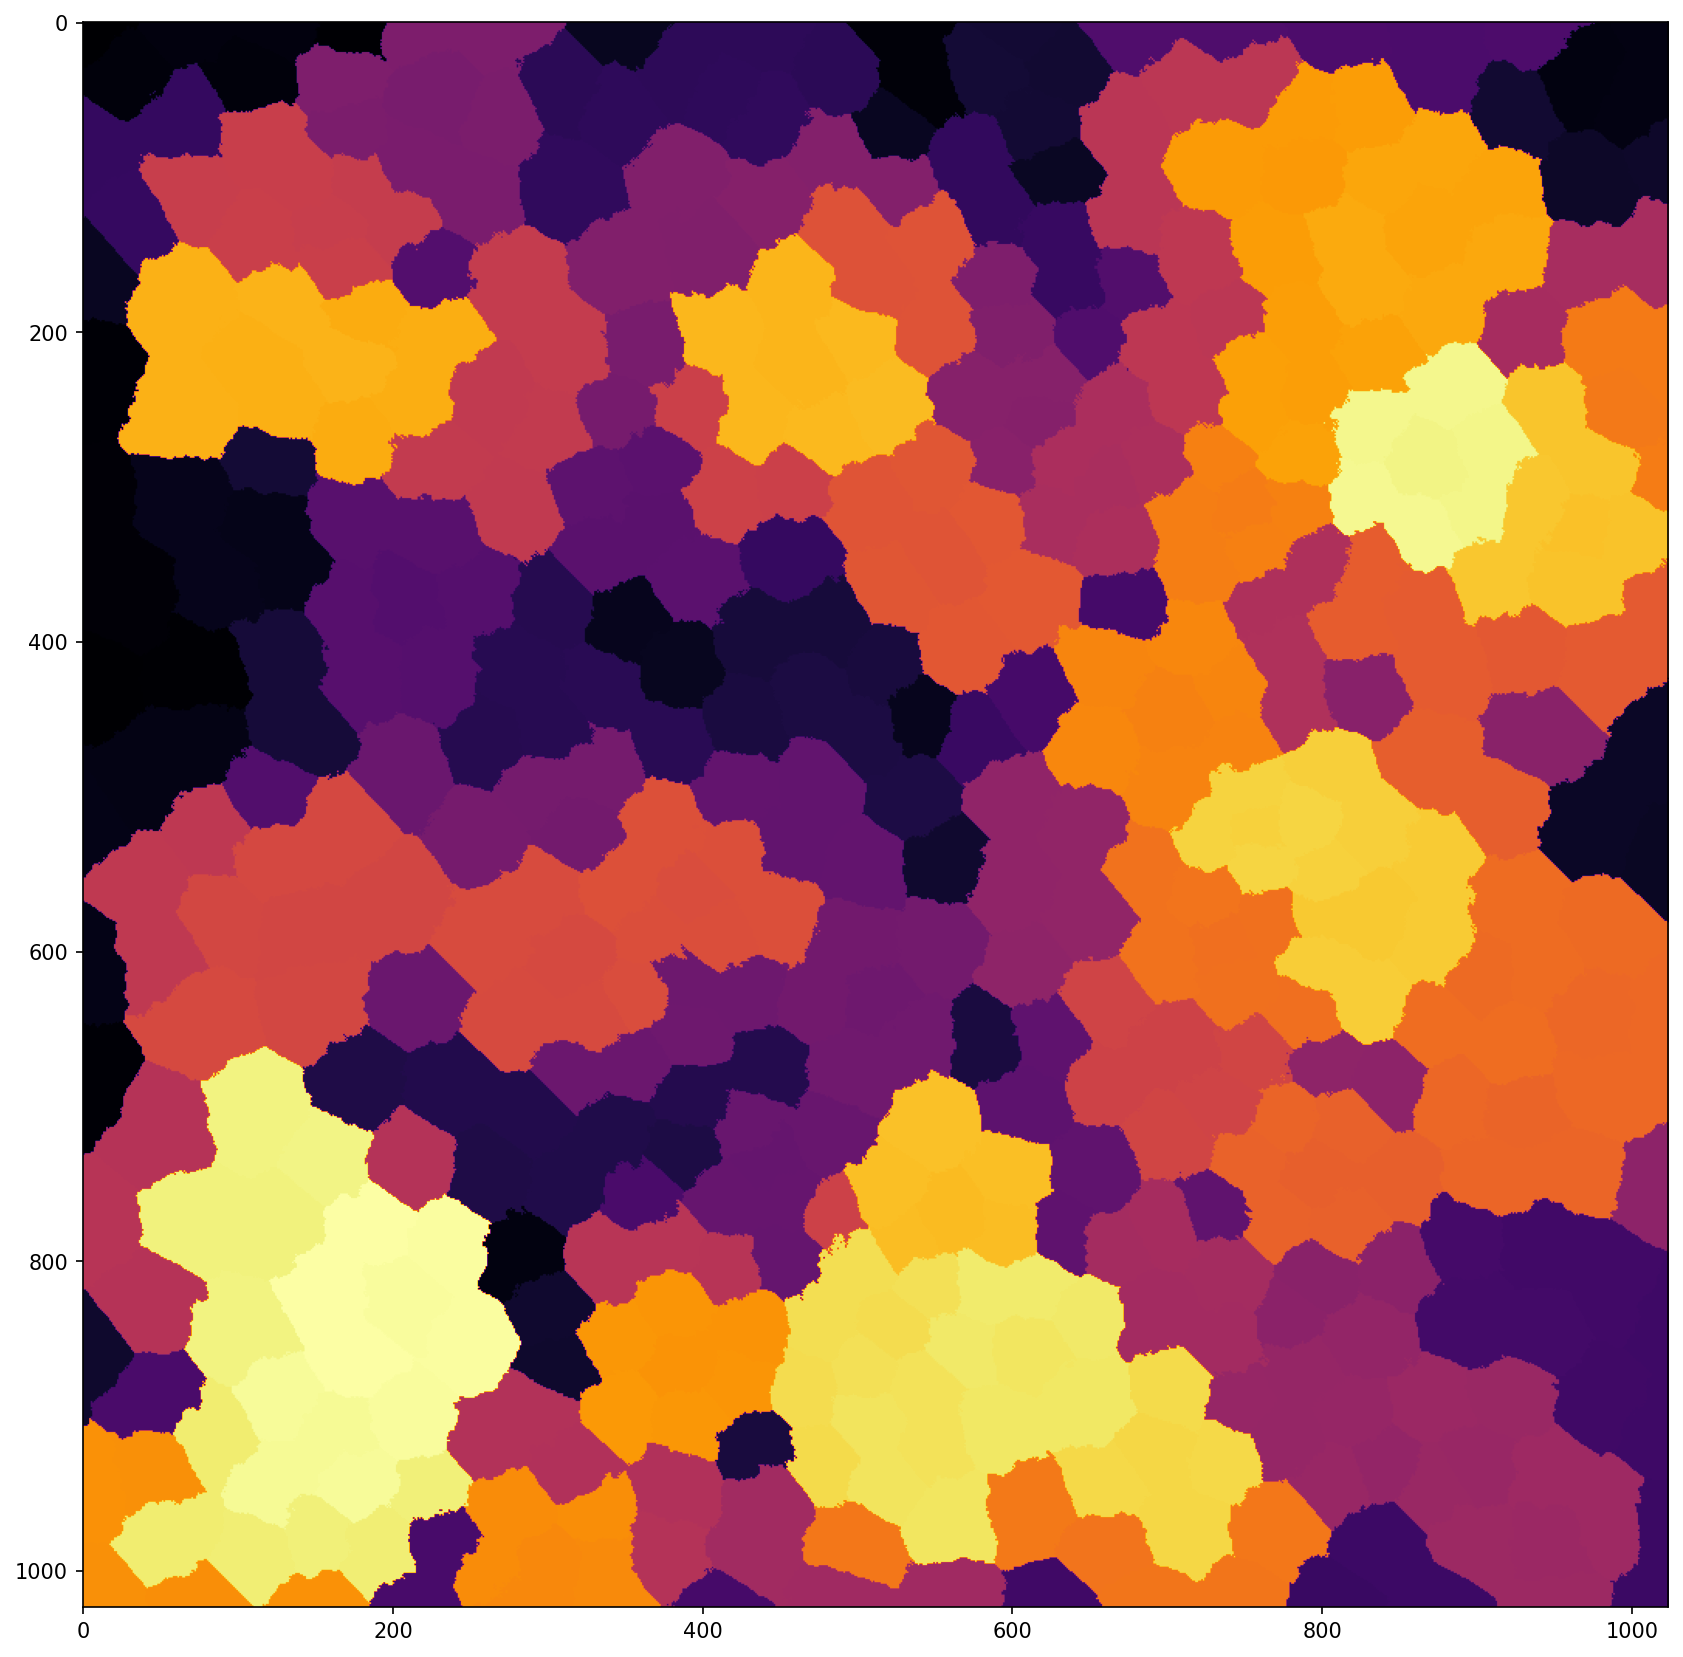

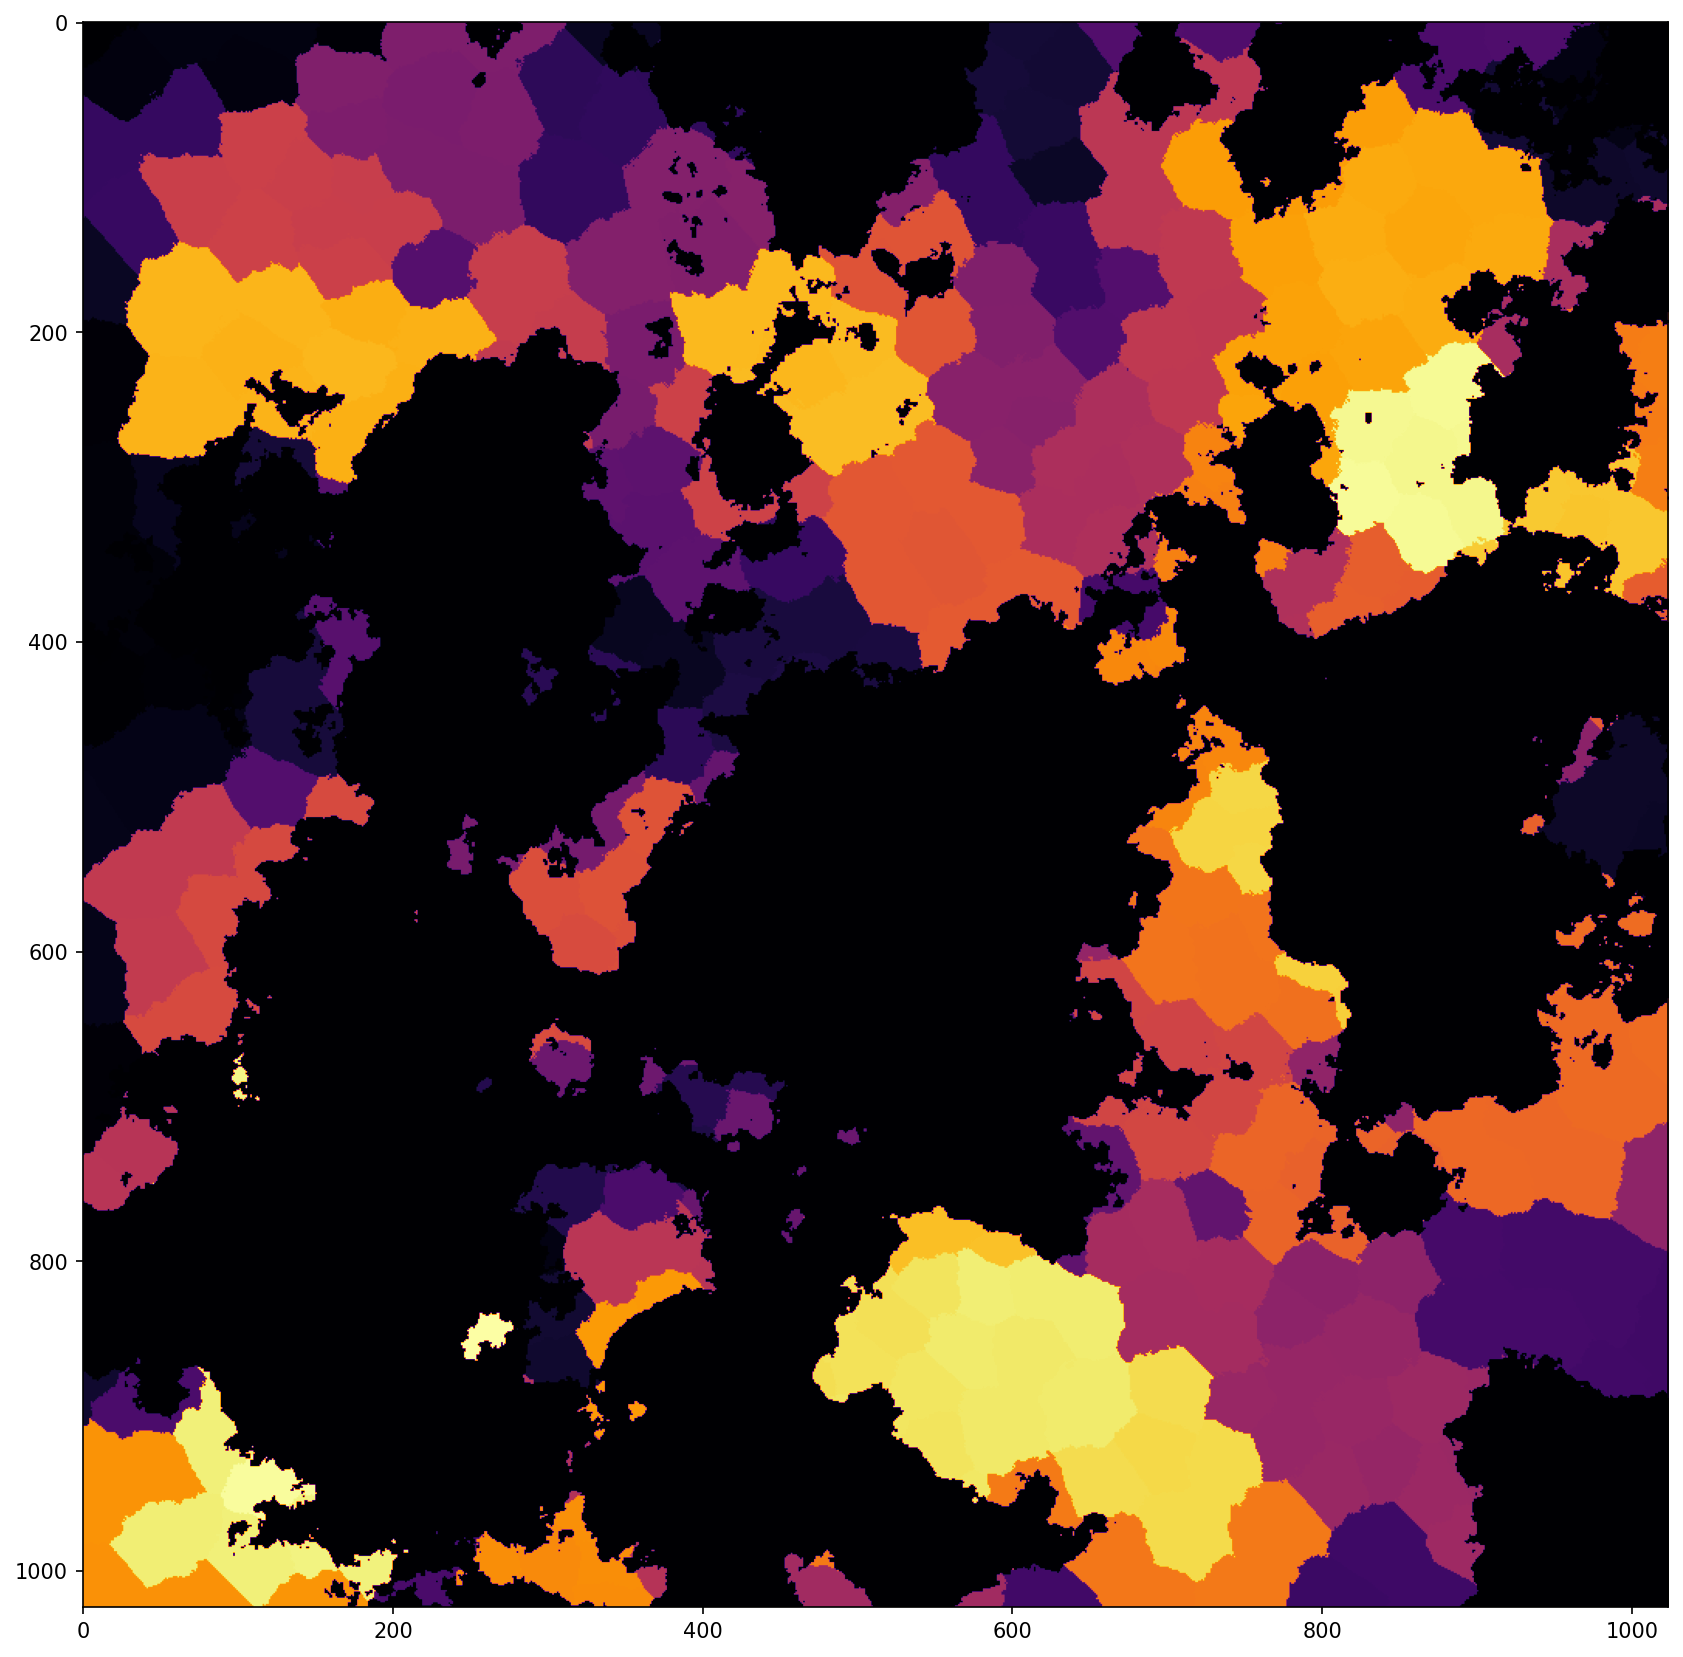

In [2]:
deniz = map()
deniz.populate_map(n_locations=512, name="",relaxed=True,k=100)
deniz.print_map("")
deniz.land_mask("")
deniz.print_map("")

In [24]:

from skimage import exposure
import numpy as np
from map_manager.noise import toddler

# Creates equlized heatmaps from noisemaps to used for attributes in maps.

def histeq(img,  alpha=1):
    img_cdf, bin_centers = exposure.cumulative_distribution(img)
    img_eq = np.interp(img, bin_centers, img_cdf)
    img_eq = np.interp(img_eq, (0, 1), (-1, 1))
    return alpha * img_eq + (1 - alpha) * img

def attibuter():
    map = toddler(1024, 2, 20,octaves=1,persistence=0.5)
    uniform_map = histeq(map, alpha=0.33)

def average_cells(vor, data):
    size = vor.shape[0]
    count = np.max(vor)+1

    sum_ = np.zeros(count)
    count = np.zeros(count)

    for i in range(size):
        for j in range(size):
            p = vor[i, j]
            count[p] += 1
            sum_[p] += data[i, j]

    average = sum_/count
    average[count==0] = 0
    return average

def fill_cells(vor, data):
    size = vor.shape[0]
    image = np.zeros((size, size))

    for i in range(size):
        for j in range(size):
            p = vor[i, j]
            image[i, j] = data[p]

    return image



In [17]:
amap = toddler(1024, 2, 20,octaves=1,persistence=0.5)
uniform_map = histeq(amap, alpha=0.33)

In [25]:
cells = average_cells(deniz.views["land"], amap)

cells = fill_cells(deniz.views["land"], cells)

/var/folders/b0/myrlwrn92tx10wp6gb5y7c540000gn/T/ipykernel_17090/1982437295.py:30: RuntimeWarning: invalid value encountered in true_divide
  average = sum_/count


In [26]:
cells.shape

(1024, 1024)

Text(0.5, 1.0, 'Temperature')

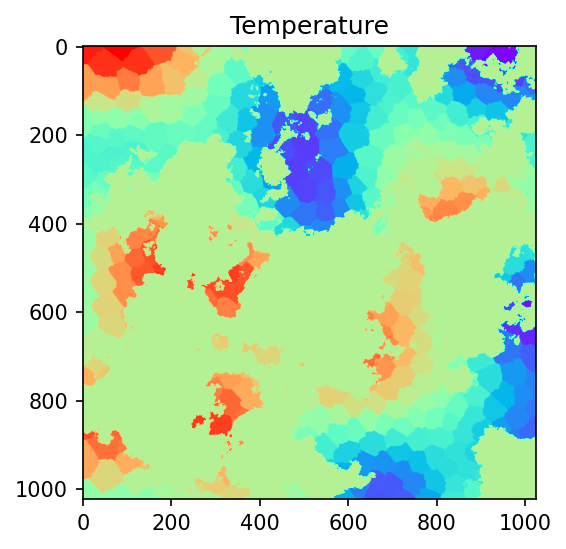

In [27]:
fig, ax = plt.subplots(1 ,1)
fig.set_dpi(150)
fig.set_size_inches(8, 4)

ax.imshow(cells, cmap="rainbow")
ax.set_title("Temperature")


In [29]:


def quantize(data, n):
    bins = np.linspace(-1, 1, n+1)
    return (np.digitize(data, bins) - 1).clip(0, n-1)

n = 256

quantize_temperature_cells = quantize(cells, n)

In [30]:
quantize_temperature_map = fill_cells(deniz.views["land"], quantize_temperature_cells)

In [ ]:
temperature_cells = quantize_temperature_cells
temperature_map = quantize_temperature_map


In [ ]:
im = temperature_map

biomes = np.zeros((256, 256))

biome_names = [
  "desert",
  "savanna",
  "tropical_woodland",
  "tundra",
  "seasonal_forest",
  "rainforest",
  "temperate_forest",
  "temperate_rainforest",
  "boreal_forest"
]
biome_colors = [
  [255, 255, 178],
  [184, 200, 98],
  [188, 161, 53],
  [190, 255, 242],
  [106, 144, 38],
  [33, 77, 41],
  [86, 179, 106],
  [34, 61, 53],
  [35, 114, 94]
]

for i, color in enumerate(biome_colors):
    indices = np.where(np.all(im == color, axis=-1))
    biomes[indices] = i
    
biomes = np.flip(biomes, axis=0).T
